# Visualizations MovieLens Data




## Loading in Data and Modules

In [ ]:
!pip install scikit-surprise
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import surprise
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
import random
from sklearn.decomposition import PCA



     |████████████████████████████████| 11.8MB 4.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617552 sha256=dba0efab538d60a51e32c2da49ad4d4489f5e8590cf4cb64cac79b7bd4bc3050
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
movies_df = pd.read_table('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt', encoding='ISO-8859-1', header=None)
ratings_df = pd.read_table('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt', encoding='ISO-8859-1', header=None)
ratings_train_df = pd.read_table('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/train.txt', encoding='ISO-8859-1', header=None)
ratings_test_df = pd.read_table('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/test.txt', encoding='ISO-8859-1', header=None)

Rename the columns of the movies df to show what the columns represent.

In [ ]:
movies_df.columns = ["Movie Id", "Movie Title", "Unknown", "Action", 'Adventure', 
                     'Animation', "Children's", "Comedy", "Crime", "Documentary",
                      "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
                     "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

ratings_df.columns = ["user_id", "movie_id", "rating"]
ratings_train_df.columns = ["user_id", "movie_id", "rating"]
ratings_test_df.columns = ["user_id", "movie_id", "rating"]

mean_rating = ratings_train_df["rating"].mean()

ratings_normalized_train_df = ratings_train_df.copy()
ratings_normalized_train_df["rating"] -=mean_rating

ratings_normalized_test_df = ratings_test_df.copy()
ratings_normalized_test_df["rating"] -=mean_rating

ratings_normalized_df = ratings_df.copy()
ratings_normalized_df["rating"] -=mean_rating

print(mean_rating)
#print(ratings_train_df.head())
print(ratings_normalized_train_df.head())
#print(ratings_normalized_test_df.head())
print(ratings_normalized_df.head())

3.5295111111111113
   user_id  movie_id    rating
0      196       242 -0.529511
1      186       302 -0.529511
2       22       377 -2.529511
3      166       346 -2.529511
4      298       474  0.470489
   user_id  movie_id    rating
0      196       242 -0.529511
1      186       302 -0.529511
2       22       377 -2.529511
3      244        51 -1.529511
4      166       346 -2.529511


In [ ]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

train_data = Dataset.load_from_df(ratings_train_df, reader)
test_data = Dataset.load_from_df(ratings_test_df, reader)
total_data = Dataset.load_from_df(ratings_df, reader)

reader_normalized = Reader(rating_scale=(1-mean_rating, 5-mean_rating))

test_normalized_data = Dataset.load_from_df(ratings_normalized_test_df, reader_normalized)
train_normalized_data = Dataset.load_from_df(ratings_normalized_train_df, reader_normalized)
total_normalized_data = Dataset.load_from_df(ratings_normalized_df, reader_normalized)




## Hyper-Parameters Tuning

1. whether to include the bias terms: a binary variable true/false
2. the strength of regularization, reg
3. the embedding length, k

In [ ]:
algorithm = SVD()
algorithm.random_state = 3
algorithm.biased = True # False for basic model 1, True for advanced model 2

algorithm.n_epochs = 100
eta = 0.005
algorithm.lr_bi = eta
algorithm.lr_bu = eta
algorithm.lr_qi = eta
algorithm.lr_pu = eta


regs = [0.02,0.1, 0.5]

Ks = [30,60,90,120,150,180,210,240,270,300] 




E_in_nest = []
E_out_nest = []
for reg in regs:
    algorithm.reg_bi = reg
    algorithm.reg_bu = reg
    algorithm.reg_qi = reg
    algorithm.reg_pu = reg

    E_in = []
    E_out = []
    for k in Ks:

        algorithm.n_factors = k

        # Train the algorithm on the training data
        algorithm.fit(train_data.build_full_trainset())

        # compute in-sample  RMSE
        predictions = algorithm.test(train_data.build_full_trainset().build_testset())
        E_in += [accuracy.mse(predictions)/2]

        # compute out-of-sample RMSE
        predictions = algorithm.test(test_data.build_full_trainset().build_testset())
        E_out += [accuracy.mse(predictions)/2]
    
    E_in_nest += [E_in]
    E_out_nest += [E_out]


MSE: 0.2449
MSE: 0.9846
MSE: 0.1094
MSE: 0.9943
MSE: 0.0654
MSE: 0.9567
MSE: 0.0477
MSE: 0.9218
MSE: 0.0399
MSE: 0.9069
MSE: 0.0360
MSE: 0.8914
MSE: 0.0334
MSE: 0.8737
MSE: 0.0320
MSE: 0.8789
MSE: 0.0310
MSE: 0.8704
MSE: 0.0303
MSE: 0.8625
MSE: 0.5432
MSE: 0.8157
MSE: 0.4925
MSE: 0.8118
MSE: 0.4710
MSE: 0.8114
MSE: 0.4577
MSE: 0.8138
MSE: 0.4503
MSE: 0.8124
MSE: 0.4431
MSE: 0.8136
MSE: 0.4378
MSE: 0.8116
MSE: 0.4347
MSE: 0.8151
MSE: 0.4313
MSE: 0.8140
MSE: 0.4292
MSE: 0.8134
MSE: 0.8838
MSE: 0.9136
MSE: 0.8838
MSE: 0.9136
MSE: 0.8837
MSE: 0.9136
MSE: 0.8837
MSE: 0.9136
MSE: 0.8837
MSE: 0.9136
MSE: 0.8836
MSE: 0.9136
MSE: 0.8836
MSE: 0.9136
MSE: 0.8836
MSE: 0.9136
MSE: 0.8835
MSE: 0.9136
MSE: 0.8835
MSE: 0.9136


In [ ]:
print("Ein ", E_in_nest)
print("Eout ", E_out_nest)

Ein  [[0.2528286995617441]]
Eout  [[0.4060711837449868]]


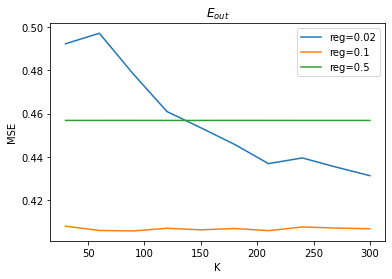

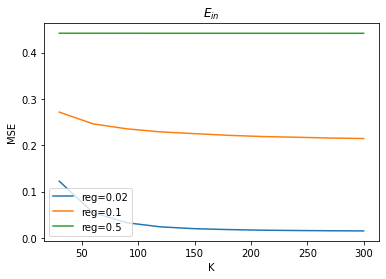

In [ ]:
#@title Parameters Tuning Plot
for i in range(len(regs)):
    plt.plot(Ks, E_out_nest[i], label="reg="+str(regs[i]))
plt.xlabel('K')
plt.ylabel('MSE') 
plt.legend(loc = "best")
plt.title('$E_{out}$')
plt.show()

for i in range(len(regs)):
    plt.plot(Ks, E_in_nest[i], label="reg="+str(regs[i]))
plt.xlabel('K')
plt.ylabel('MSE') 
plt.legend(loc = "best")
plt.title('$E_{in}$')
plt.show()

## Train with the optimal parameters



In [ ]:
algorithm = SVD()
algorithm.random_state = 3
algorithm.biased = True

reg = 0.1 
eta = 0.03
algorithm.n_factors = 20
algorithm.n_epochs =39


algorithm.reg_bi = reg
algorithm.reg_bu = reg
algorithm.reg_qi = reg
algorithm.reg_pu = reg


algorithm.lr_bi = eta
algorithm.lr_bu = eta
algorithm.lr_qi = eta
algorithm.lr_pu = eta



# Train the algorithm on the entire training data
trainset = total_data.build_full_trainset()
algorithm.fit(trainset)

# compute in-sample  RMSE
predictions = algorithm.test(trainset.build_testset())
print("Ein: ", accuracy.mse(predictions)/2)




MSE: 0.5447
Ein:  0.27236434422284894


# Extract the film Matrix and Plot

In [ ]:
def normalize(lat):
  lat_nm = (lat - np.mean(lat))/np.std(lat)
  return lat_nm



V = algorithm.qi
V = normalize(V)

print(V.shape)

pca = PCA(n_components = 2)
pca.fit(V)
V_reduced = pca.transform(V)

print(V_reduced.shape)



(1682, 20)
(1682, 2)


In [ ]:
def genre_plot(V, trainset, genre, C):
    """
    input: 
        V: The 1628 * 2 matrix that describes all films
        genre: string, that specifies the genre of the film
        C: string, that specifies the color
    output: 
        scatter plot of the collection of films, with color C
    """
    genre_id = movies_df[movies_df[genre] == 1]["Movie Id"].tolist() 
    genre_inner_id = []
    for id in genre_id:
        genre_inner_id += [trainset.to_inner_iid(id)]
    V_genre = V[genre_inner_id,:]
    plt.scatter(V_genre[:,0],V_genre[:,1], alpha = 0.5, color = C, label = genre)

def genre_center_plot(V, trainset, genre, C):
    """
    input: 
        V: The 1628 * 2 matrix that describes all films
        genre: string, that specifies the genre of the film
        C: string, that specifies the color
    output: 
        central mean of the genre
    """
    genre_id = movies_df[movies_df[genre] == 1]["Movie Id"].tolist() 
    genre_inner_id = []
    for id in genre_id:
        genre_inner_id += [trainset.to_inner_iid(id)]
    V_genre = V[genre_inner_id,:]
    plt.scatter(V_genre[:,0].mean(),V_genre[:,1].mean(), alpha = 1, color = C, label = genre, s = 100)

def film_title_plot(V, title, C, size = 60):
    """
    input: 
        V: The 1628 * 2 matrix that describes all films
        title: string, that specifies a movie title
        C: string, that specifies the color
    output: 
        scatter plot of the collection of films, with color C
    """
    movie_idx = movies_df[movies_df["Movie Title"] == title].index.tolist() 
    title_coordinate = V[movie_idx][0]
    plt.scatter(title_coordinate[0],title_coordinate[1], alpha = 1, color = C, s = size)
    plt.annotate(title, (title_coordinate[0],title_coordinate[1]))

def film_id_plot(V, trainset, ids, C, size = 60, l=""):

    """
    input: 
        V: The 1628 * 2 matrix that describes all films
        id: list of integer, that specifies a movie title
        C: string, that specifies the color
    output: 
        scatter plot of the collection of films, with color C
    """
    flag = True
    for id in ids:
        #movie_idx = movies_df[movies_df["Movie Id"] == id].index.tolist() 
        title = movies_df[movies_df["Movie Id"] == id]["Movie Title"].tolist()[0]
        inner_id = trainset.to_inner_iid(id)
        title_coordinate = V[inner_id]
        if flag:
            plt.scatter(title_coordinate[0],title_coordinate[1], alpha = 0.5, color = C, s = size, label=l)
            flag = False
        else:
            plt.scatter(title_coordinate[0],title_coordinate[1], alpha = 0.5, color = C, s = size)
        plt.annotate(title, (title_coordinate[0],title_coordinate[1]), size = 10)


# Similarity Clusters
We expect films of similar genres to be near each other

Text(0.5, 1.0, 'Movie Clusters Visualization')

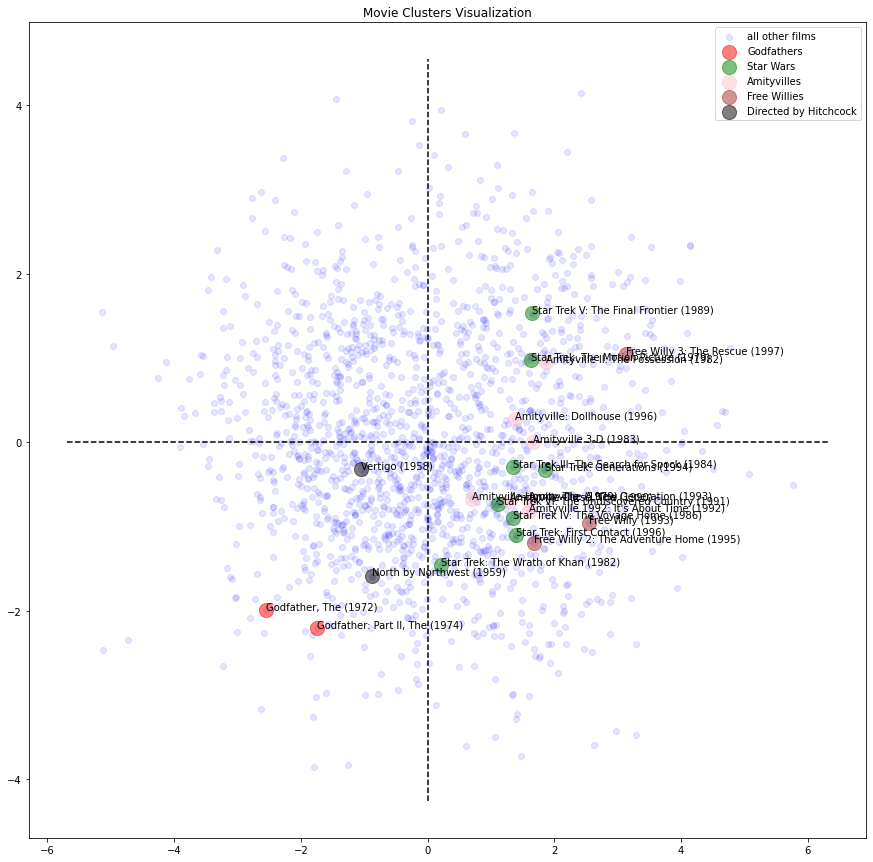

In [ ]:

plt.figure(figsize=(15,15))

plt.scatter(V_reduced[:,0],V_reduced[:,1], alpha = 0.1, color = "b", label = "all other films")
film_id_plot(V_reduced, trainset, [127, 187], 'r', 200, l = "Godfathers")
film_id_plot(V_reduced, trainset, [222, 227, 228, 229, 230, 380, 449, 450], 'g', 200, l = "Star Wars")
film_id_plot(V_reduced, trainset, [437, 438, 439, 440, 441, 442, 858], 'pink', 200, l = "Amityvilles")
film_id_plot(V_reduced, trainset, [35, 78, 457], 'brown', 200, l = "Free Willies")
film_id_plot(V_reduced, trainset, [479, 480], 'black', 200, l = "Directed by Hitchcock")
xmin,xmax = plt.xlim()
plt.hlines(0, xmin,xmax, linestyles = 'dashed')
ymin,ymax = plt.ylim()
plt.vlines(0,ymin,ymax,linestyles ='dashed')
plt.legend(loc='best')
plt.title('Movie Clusters Visualization')

# Genre Centers
From the geometric center of each genre, we can see that the horizontal
axis roughly correspond to the "seriousness" of movies.

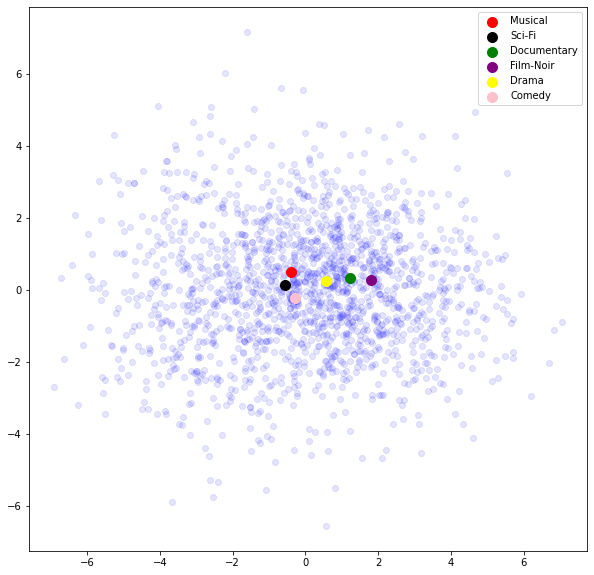

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(V_reduced[:,0],V_reduced[:,1], alpha = 0.1, color = "b")
genre_center_plot(V_reduced,trainset, "Musical", "red")
genre_center_plot(V_reduced,trainset, "Sci-Fi", "black")
genre_center_plot(V_reduced,trainset, "Documentary", "green")
genre_center_plot(V_reduced,trainset, "Film-Noir", "purple")
genre_center_plot(V_reduced,trainset, "Drama", "yellow")
genre_center_plot(V_reduced,trainset, "Comedy", "pink")
plt.legend(loc = "best")
plt.show()